# L4: Analiza eksploracyjna zbioru danych

## Exploratory data analysis (EDA)
---

Przed rozpoczęciem rozwiązywania problemu przy użyciu metod uczenia maszynowego, w szczególności przed rozpoczęciem budowania modelu, konieczne jest sprawdzenie, z jakimi danymi przyszło się nam mierzyć. 

Wśród podstawowych kwestii, które powinniśmy sprawdzić, są:
- ile mamy cech?
- które spośród nich to cechy kategoryczne, a które numeryczne?
- jakie wartości przyjmują poszczególne cechy?
- czy wśród danych są brakujące wartości?
- czy istnieje i jak wygląda etykieta? (w szczególności - czy mierzymy się z zadaniem klasyfikacji, regresji czy klasteryzacji?) 
- czy dane są zbalansowane względem danej wyjściowej?

Dla małych i prostych zbiorów do nauki (tzw. _toy tasks_), zazwyczaj wystarczające jest ręczne przejrzenie pliku z danymi, by potrafić odpowiedzieć na w/w pytania. Niemniej przy bardziej ambitnych zadaniach, z pomocą przychodzą narzędzia automatyzujące pracę. 

### Przykładowy zbiór danych

Przeanalizujmy klasyczny zbiór danych dotyczący wina (opublikowany przez `Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy`, więcej informacji [tutaj](https://archive.ics.uci.edu/ml/datasets/wine))

Zbiór zawiera właściwości fizykochemiczne różnych próbek wina pobranych z jednego z regionów słonecznej Italii, jednakże pochodzących od trzech różnych plantatorów. Założeniem problemu jest określenie, który z nich jest wytwórcą danej próbki.

W celu uczynienia przykładu ambitniejszym, zbiór został celowo zaszumiony - tj. usunięto losowo część wartości.

Zacznijmy od wczytania zbioru:

In [1]:
import pandas as pd

df = pd.read_csv(
    "../docs/lab4/wine_with_nulls.csv",
)
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0            NaN   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59   NaN               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3         NaN                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

Na pierwszy rzut oka możemy stwierdzić, że wszystkie kolumny są numeryczne, ale ich wartości różnią się dość znacząco. 

Podstawowe informacje o statystykach zbioru danych możemy uzyskać przy wbudowanej w Pandas metodzie `describe()`

In [2]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  171.000000  170.000000  170.000000         167.000000  169.000000   
mean    13.009357    2.318059    2.360000          19.404790  100.088757   
std      0.819951    1.108406    0.275004           3.328986   14.490898   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.370000    1.575000    2.202500          17.150000   88.000000   
50%     13.050000    1.850000    2.360000          19.400000   98.000000   
75%     13.700000    3.030000    2.547500          21.500000  108.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     171.000000  167.000000            171.000000       173.000000   
mean        2.291988    2.019760              0.365614         1.583295   
std         0.626310    1.006122              0.123074         0.572402   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.730000    1.095000              0.270000         1.250000   
50%         2.350000    2.170000              0.340000         1.540000   
75%         2.800000    2.885000              0.445000         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       170.000000  175.000000                    170.000000   172.000000   
mean          5.009529    0.959920                      2.615176   756.209302   
std           2.292621    0.228525                      0.706861   315.609153   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.785000                      1.970000   508.000000   
50%           4.640000    0.980000                      2.780000   679.000000   
75%           6.122500    1.120000                      3.177500   996.250000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

### Wykresy z użyciem metod Pandas

Pandas udostępnia prosty interfejs rysowania wykresów Matplotlib bezpośrednio z DataFrame. Dzięki temu możemy prościej zwizualizowac wartości numeryczne i zaobserwować charakterystykę zbioru danych. 

<Axes: >

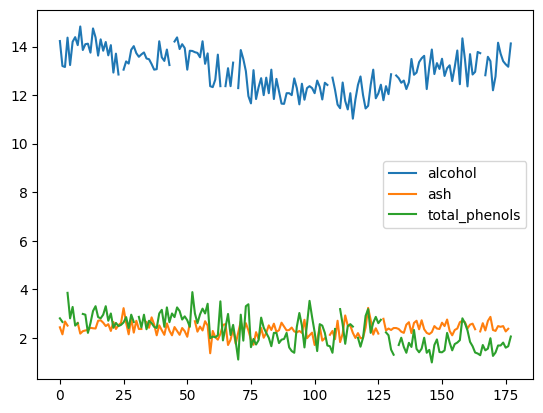

In [3]:
df = df[["alcohol", "ash", "total_phenols"]]

df.plot()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

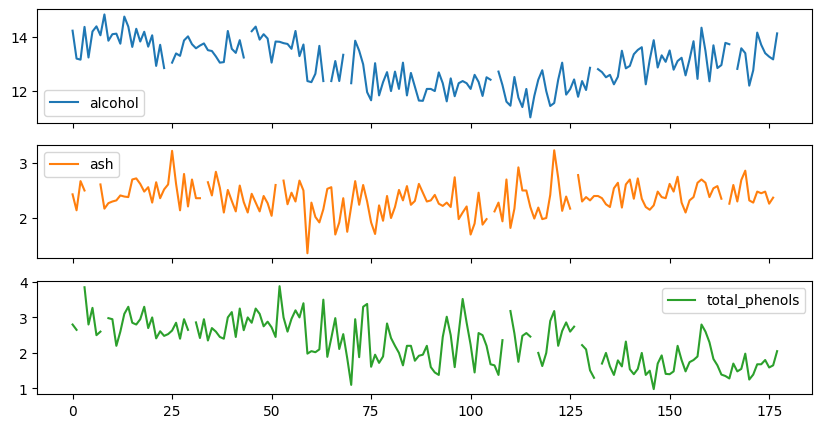

In [4]:
df.plot(subplots=True, figsize=(10, 5))

array([<Axes: title={'center': 'alcohol'}>,
       <Axes: title={'center': 'ash'}>,
       <Axes: title={'center': 'total_phenols'}>], dtype=object)

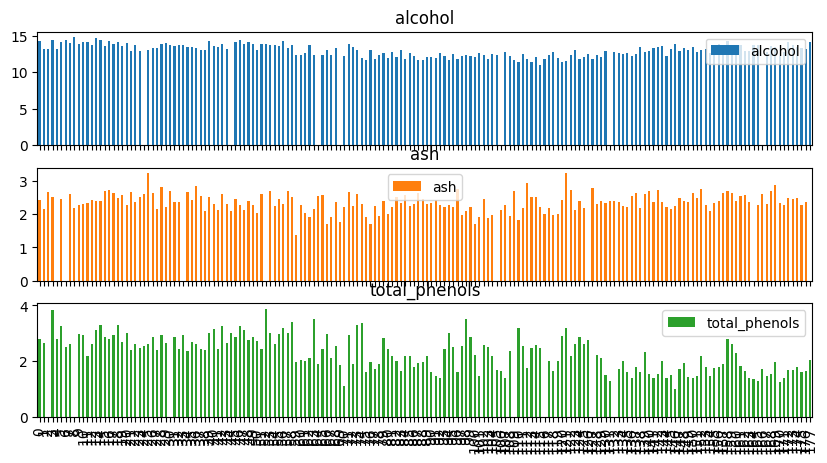

In [5]:
df.plot(kind="bar", subplots=True, figsize=(10, 5))

array([[<Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='ash', ylabel='alcohol'>,
        <Axes: xlabel='total_phenols', ylabel='alcohol'>],
       [<Axes: xlabel='alcohol', ylabel='ash'>,
        <Axes: xlabel='ash', ylabel='ash'>,
        <Axes: xlabel='total_phenols', ylabel='ash'>],
       [<Axes: xlabel='alcohol', ylabel='total_phenols'>,
        <Axes: xlabel='ash', ylabel='total_phenols'>,
        <Axes: xlabel='total_phenols', ylabel='total_phenols'>]],
      dtype=object)

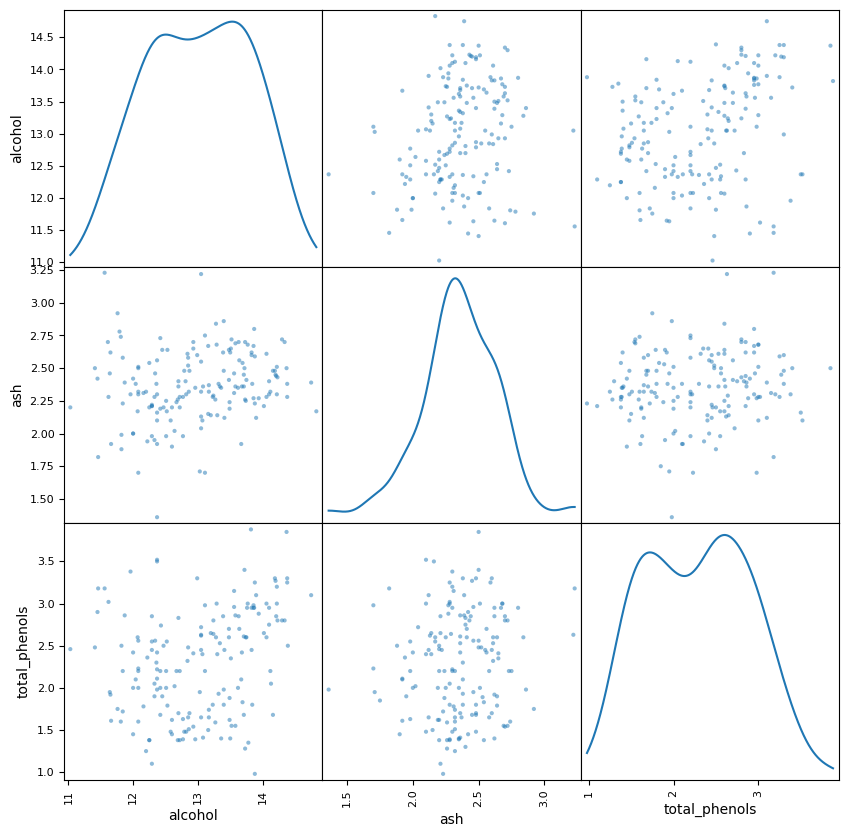

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal="kde")

```{seealso}
Więcej o możliwościach Pandas w kontekście generowania wykresów - w [dokumentacji](https://pandas.pydata.org/docs/user_guide/visualization.html)
```

### Ydata-profiling

Ydata-profiling (w przeszłości *pandas-profiling*) - biblioteka automatycznie analizująca zbiór danych i generujaca interaktywny raport. Alternatywnie, raport można zapisać w formacie `.html`

Instalacja przebiega standardowo:

```pip install ydata-profiling```

Użycie biblioteki jest niezwykle proste:

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

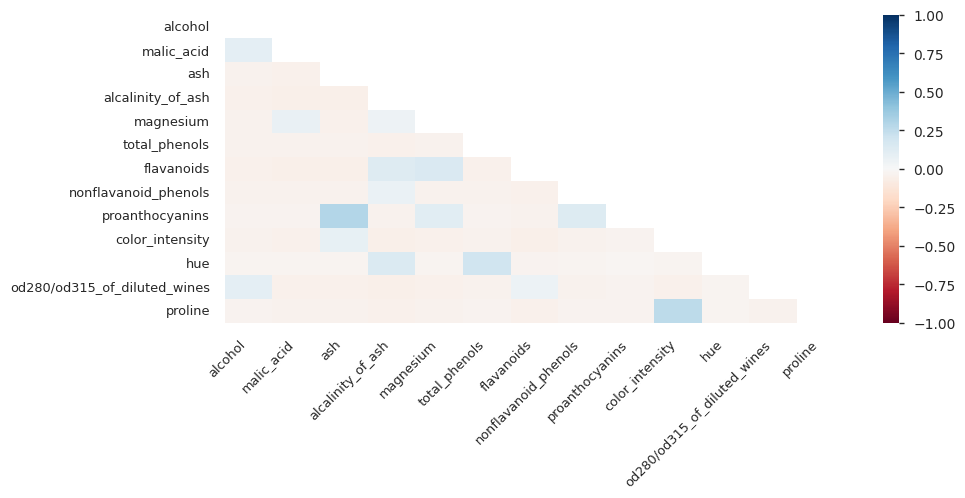

In [7]:
from ydata_profiling import ProfileReport

df = pd.read_csv(
    "../docs/lab4/wine_with_nulls.csv",
)

profile = ProfileReport(df)
profile.to_notebook_iframe()

Z raportu dowiadujemy się między innymi:
- mamy 13 kolumn numerycznych (dane wejściowe), jedną kategoryczną (etykieta) - będziemy więc zajmować się klasyfikacją
- klasy są całkiem nieźle zbalansowane (39%, 33%, 27%)
- mamy kolumny z pustymi wartościami
- możemy dokładnie przeanalizować statystyki poszczególnych cech, ich histogramy oraz wykresy zależności pomiędzy nimi

## Redukcja wymiarowości jako element EDA
---

W przypadku dużej ilości wymiarów danych, przydatne stają się metody redukcji wymiarowości. Pozwalają one mn. zmniejszyć ilość danych koniecznych do przeanalizowania, poprzez przekształcenia wartości pokazując zależności danych.

Dzięki metodom redukcji wymiarowości mamy możliwość wizualizacji całego zbioru danych w 2D lub 3D - w przeciwnym wypadku, analizując wykresy pojedynczych kolumn lub zalezności pomiędzy dwoma kolumnami (np. scatter matrix z Pandasa), nie mamy pełnego oglądu na całość datasetu.

### Analiza głównych składowych (ang. Principal Components Analysis - PCA)
Najpopularniejsza metoda redukcji wymiarów. Dzięki modyfikacjom układu współrzędnych, stara się maksymalizować wariancję danych pierwszych wymiarów. 

Przykładowe działanie:
![](../docs/lab4/pca.png)

```{seealso}
PCA jest najpopularniejszą metodą, ale oprócz wielu zalet (np. determinizm) ma sporo wad (np. brak zachowania lokalności klastrów). Warto popatrzeć na alternatywne metody - [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) lub [UMAP](https://umap-learn.readthedocs.io/en/latest/) 
```

### Przykład użycia PCA

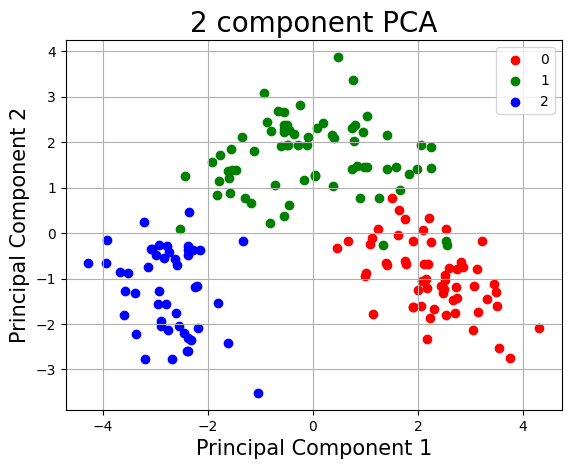

In [8]:
# PCA nie przyjmuje brakujących wartości - wczytamy więc pełnowymiarową wersję datasetu wine, dla uproszczenia
from sklearn.datasets import load_wine

loaded_wine = load_wine(as_frame=True)


# PCA jest wrażliwe na skalę wartości poszczególnych cech - zeskalujemy je więc

from sklearn.preprocessing import StandardScaler

# separujemy cechy od targetu
x = loaded_wine["data"].values
y = loaded_wine["target"].values

# i standaryzujemy wartości cech
x = StandardScaler().fit_transform(x)
#
# dokonujemy analizy PCA do 2 wymiarów
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(x)

principal_df = pd.DataFrame(data=transformed, columns=["component 1", "component 2"])
pca_df = pd.concat([principal_df, loaded_wine["target"]], axis=1)

#
# wizualizujemy przekształcony zbiór
#
import matplotlib.pyplot as plt

plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.title("2 component PCA", fontsize=20)
targets = loaded_wine.target.unique()
colors = ["r", "g", "b"]

for target, color in zip(targets, colors):
    indices_to_keep = pca_df["target"] == target
    plt.scatter(
        pca_df.loc[indices_to_keep, "component 1"],
        pca_df.loc[indices_to_keep, "component 2"],
        c=color,
    )
plt.legend(targets)
plt.grid()

Dokonując metody redukcji wymiarowości, tracimy część informacji zawartych w danych. Badając rozkład wariancji względem komponentów, możemy zbadać efektywność redukcji wymiarów - a co za tym idzie, oszacować na ile możemy polegać na wynikach PCA 

In [9]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [10]:
pca2 = PCA(n_components=13)
transformed = pca2.fit_transform(x)
pca2.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

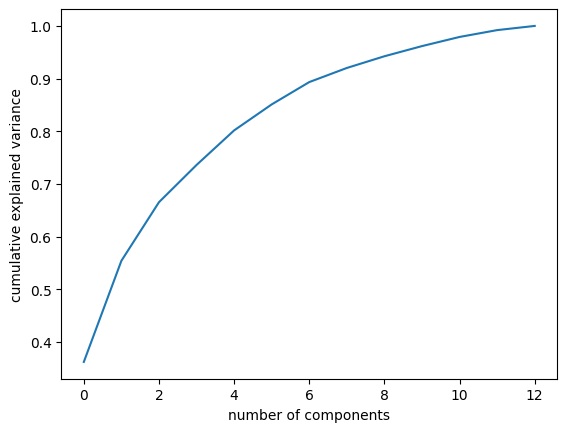

In [11]:
import numpy as np

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");

Używając jedynie dwóch wymiarów, gromadzimy ponad 55% wariancji informacji zawartych w bazowych 13 wymiarach danych. Wynik nie powala na kolana, ale wizualizacja pokazuje że powinno to być wystarczające by stwierdzić, że nasz zbiór danych jest separowalny

## EDA danych tekstowych
---

Wyżej przedstawione metody działają w przypadku zbiorów zawierających dane numeryczne, w szczególności ciągłe. W przypadku danych tekstowych, do uzyskania wstępnego zrozumienia danych które mamy obrabiać może służyć np. wizualizacja częstotliwości pojawiających się słów.

In [12]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(
    subset="train",
    categories=["alt.atheism", "sci.space"],
    remove=("headers", "footers", "quotes"),
)

In [13]:
newsgroups_df = pd.DataFrame(newsgroups["data"], columns=["text"])
newsgroups_df["target"] = pd.Series(newsgroups["target"])
newsgroups_df["target"] = newsgroups_df.apply(
    lambda x: "alt.atheism" if x["target"] == 0 else "sci.space", axis=1
)
newsgroups_df.head()

text       target
0  : \n: >> Please enlighten me.  How is omnipote...  alt.atheism
1  In <19APR199320262420@kelvin.jpl.nasa.gov> baa...    sci.space
2  \nHenry, I made the assumption that he who get...    sci.space
3  \n\n\nNo. I estimate a 99 % probability the Ge...    sci.space
4  \nLucky for them that the baby didn't have any...  alt.atheism

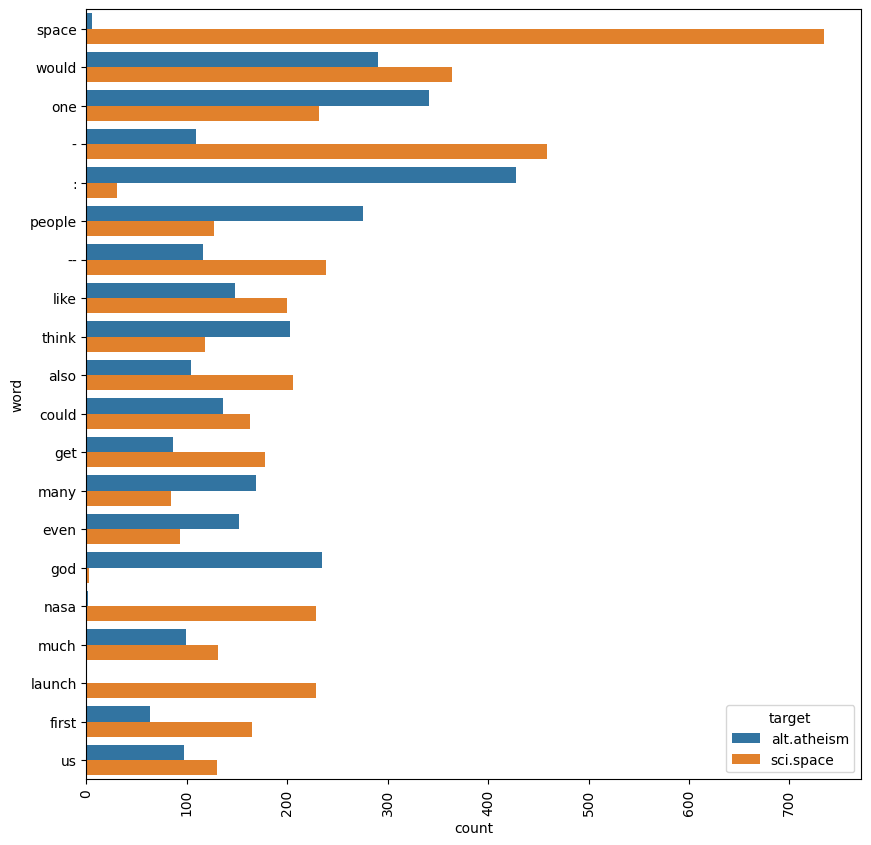

In [14]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords

stop = stopwords.words("english")

newsgroups_df["tokenized_text"] = newsgroups_df["text"].str.lower().str.split()

df_exploded = (
    newsgroups_df.explode("tokenized_text")
    .reset_index(drop=True)
    .rename(columns={"tokenized_text": "word"})
)
df_exploded = df_exploded[~df_exploded["word"].isin(stop)]

plt.figure(figsize=(10, 10))
sns.countplot(
    y="word",
    data=df_exploded,
    order=df_exploded["word"].value_counts().iloc[:20].index,
    hue="target",
)
plt.xticks(rotation=90)
plt.show()

```{hint}
Powyższy przykład zakłada taką samą ilość tekstu dla każdej z kategorii. W rzeczywistym przypadku należy liczbę wystąpień znormalizować.
```